In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import cmocean as cmo
import pandas as pd

In [85]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [12]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

mesh_mask = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/mesh_mask.nc')

mbathy = mesh_mask['mbathy'][0,...]

Z = bathy.variables['Bathymetry'][:]

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


NEP_aug = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_T_S_Spice_aug_larger_offshore_rho_correct.nc')


sal_aug = NEP_aug.variables['vosaline']
temp_aug = NEP_aug.variables['votemper']
spic_aug = NEP_aug.variables['spiciness']
rho_aug = NEP_aug.variables['density']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


NEP_jul = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_T_S_Spice_july_larger_offshore_rho_correct.nc')


sal_jul  = NEP_jul.variables['vosaline']
temp_jul = NEP_jul.variables['votemper']
spic_jul = NEP_jul.variables['spiciness']
rho_jul = NEP_jul.variables['density']

NEP_jun = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_T_S_Spice_june_larger_offshore_rho_correct.nc')


sal_jun  = NEP_jun.variables['vosaline']
temp_jun = NEP_jun.variables['votemper']
spic_jun = NEP_jun.variables['spiciness']
rho_jun = NEP_jun.variables['density']

In [3]:
STATION_LINE = ['LA' , 'LB', 'LBA', 'LC', 'LCB', 'RS']

numbers_LA = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O']

numbers_LB = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O', '11', '12', '13', '14', '15', '16']

numbers_LBA = ['O', '1', '2', '3', '4']

numbers_LC = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O', '11', '12']

numbers_LCB = ['1', '2', '3', '4', '5', '6']

numbers_RS = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7']


lon_stations_LA = [-124.7275, -124.8553, -124.9620, -125.0687, \
           -125.1767, -125.2867, -125.3977, -125.5067, -125.6153, -125.7233]
lat_stations_LA = [48.4872, 48.4375, 48.3807, 48.3227, 48.2680, 48.2105, 48.1533, 48.0963, 48.0393, 47.9837]



lon_stations_LB = [-124.9913, -125.0400, -125.0930, -125.1453, -125.2000, -125.2585, -125.3683, \
                  -125.4775, -125.5800, -125.6892, -125.7958, -125.8650, -125.9353, -126.0000, -126.1410, -126.2833]
lat_stations_LB = [48.6733, 48.6500, 48.6220, 48.5945, 48.5667, 48.5363, 48.4780, 48.4217, 48.3667, \
                  48.3095, 48.2533, 48.2153, 48.1767, 48.1413, 48.0727, 48.0088]



lon_stations_LBA = [-124.9667, -125.0633, -125.1300, -125.3467, -125.5000]
lat_stations_LBA = [48.5767, 48.5283, 48.4233, 48.3908, 48.2153]



lon_stations_LC = [-125.4622, -125.5158, -125.5707, -125.6800, -125.7900, -125.9000, -126.0083, -126.1183, \
                  -126.2283, -126.3367, -126.4450, -126.6667]
lat_stations_LC = [48.8407, 48.8113, 48.7825, 48.7238, 48.6657, 48.6077, 48.5493, 48.4908, 48.4323,\
                   48.3733, 48.3158, 48.2500]

lon_stations_LCB = [-125.3667, -125.4508, -125.5000, -125.5917, -125.8300, -126.0633]
lat_stations_LCB = [48.7490, 48.6858, 48.5750, 48.5333, 48.4717, 48.3783]


lon_stations_RS = [-125.2233, -125.3267, -125.4317, -125.5683, -125.7200, -125.9433, -126.1317]
lat_stations_RS = [48.7567, 48.7092, 48.6433, 48.5683, 48.4867, 48.3633, 48.2600]

In [4]:
LINE_LA_stations  = []
LINE_LB_stations  = []
LINE_LBA_stations = []
LINE_LC_stations  = []
LINE_LCB_stations  = []
LINE_RS_stations  = []

for i in np.arange(len(numbers_LA)):
    value = STATION_LINE[0]+numbers_LA[i]
    LINE_LA_stations = np.append(LINE_LA_stations, value)
    
for i in np.arange(len(numbers_LB)):
    value = STATION_LINE[1]+numbers_LB[i]
    LINE_LB_stations = np.append(LINE_LB_stations, value)
    
for i in np.arange(len(numbers_LBA)):
    value = STATION_LINE[2]+numbers_LBA[i]
    LINE_LBA_stations = np.append(LINE_LBA_stations, value)
    
for i in np.arange(len(numbers_LC)):
    value = STATION_LINE[3]+numbers_LC[i]
    LINE_LC_stations = np.append(LINE_LC_stations, value)

for i in np.arange(len(numbers_LCB)):
    value = STATION_LINE[4]+numbers_LCB[i]
    LINE_LCB_stations = np.append(LINE_LCB_stations, value)
    
for i in np.arange(len(numbers_RS)):
    value = STATION_LINE[5]+numbers_RS[i]
    LINE_RS_stations = np.append(LINE_RS_stations, value)
    
    
LA_lon_locations = pd.Series(data = lon_stations_LA, index = LINE_LA_stations)
LA_lat_locations = pd.Series(data = lat_stations_LA, index = LINE_LA_stations)    
        
LB_lon_locations = pd.Series(data = lon_stations_LB, index = LINE_LB_stations)
LB_lat_locations = pd.Series(data = lat_stations_LB, index = LINE_LB_stations)

LBA_lon_locations = pd.Series(data = lon_stations_LBA, index = LINE_LBA_stations)
LBA_lat_locations = pd.Series(data = lat_stations_LBA, index = LINE_LBA_stations)

LC_lon_locations = pd.Series(data = lon_stations_LC, index = LINE_LC_stations)
LC_lat_locations = pd.Series(data = lat_stations_LC, index = LINE_LC_stations)

LCB_lon_locations = pd.Series(data = lon_stations_LCB, index = LINE_LCB_stations)
LCB_lat_locations = pd.Series(data = lat_stations_LCB, index = LINE_LCB_stations)

RS_lon_locations = pd.Series(data = lon_stations_RS, index = LINE_RS_stations)
RS_lat_locations = pd.Series(data = lat_stations_RS, index = LINE_RS_stations)


    

In [5]:
def find_NEP36_model_point(line, station_number):
    if line == 'LA':
        loc = np.where(LINE_LA_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LA[int(loc[0])],lat_stations_LA[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

    if line == 'LB':
        loc = np.where(LINE_LB_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LB[int(loc[0])],lat_stations_LB[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LC':
        loc = np.where(LINE_LC_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LC[int(loc[0])],lat_stations_LC[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LBA':
        loc = np.where(LINE_LBA_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LBA[int(loc[0])],lat_stations_LBA[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LCB':
        loc = np.where(LINE_LCB_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LCB[int(loc[0])],lat_stations_LCB[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'RS':
        loc = np.where(LINE_RS_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_RS[int(loc[0])],lat_stations_RS[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    return j,i
        
    

In [6]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]

In [7]:
j,i = find_NEP36_model_point('LB', 'LBO8')

print(j,i)

264 599


In [8]:
sal_jun.shape

(30, 50, 1021, 715)

In [13]:
LB_08_sal_jun = sal_jun[:,:,j,i]
LB_08_sal_july = sal_jul[:,:,j,i]
LB_08_sal_aug = sal_aug[:,:,j,i]

LB_08_sal = np.concatenate((LB_08_sal_jun, LB_08_sal_july, LB_08_sal_aug), axis = 0)

LB_08_tem_jun = temp_jun[:,:,j,i]
LB_08_tem_july = temp_jul[:,:,j,i]
LB_08_tem_aug = temp_aug[:,:,j,i]

LB_08_tem = np.concatenate((LB_08_tem_jun, LB_08_tem_july, LB_08_tem_aug), axis = 0)

LB_08_spic_jun = spic_jun[:,:,j,i]
LB_08_spic_july = spic_jul[:,:,j,i]
LB_08_spic_aug = spic_aug[:,:,j,i]

LB_08_spic = np.concatenate((LB_08_spic_jun, LB_08_spic_july, LB_08_spic_aug), axis = 0)

LB_08_rho_jun = rho_jun[:,:,j,i]
LB_08_rho_july = rho_jul[:,:,j,i]
LB_08_rho_aug = rho_aug[:,:,j,i]

LB_08_rho = np.concatenate((LB_08_rho_jun, LB_08_rho_july, LB_08_rho_aug), axis = 0) - 1000


date = np.array('2015-06-01', dtype=np.datetime64)

date = date + np.arange(92)

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


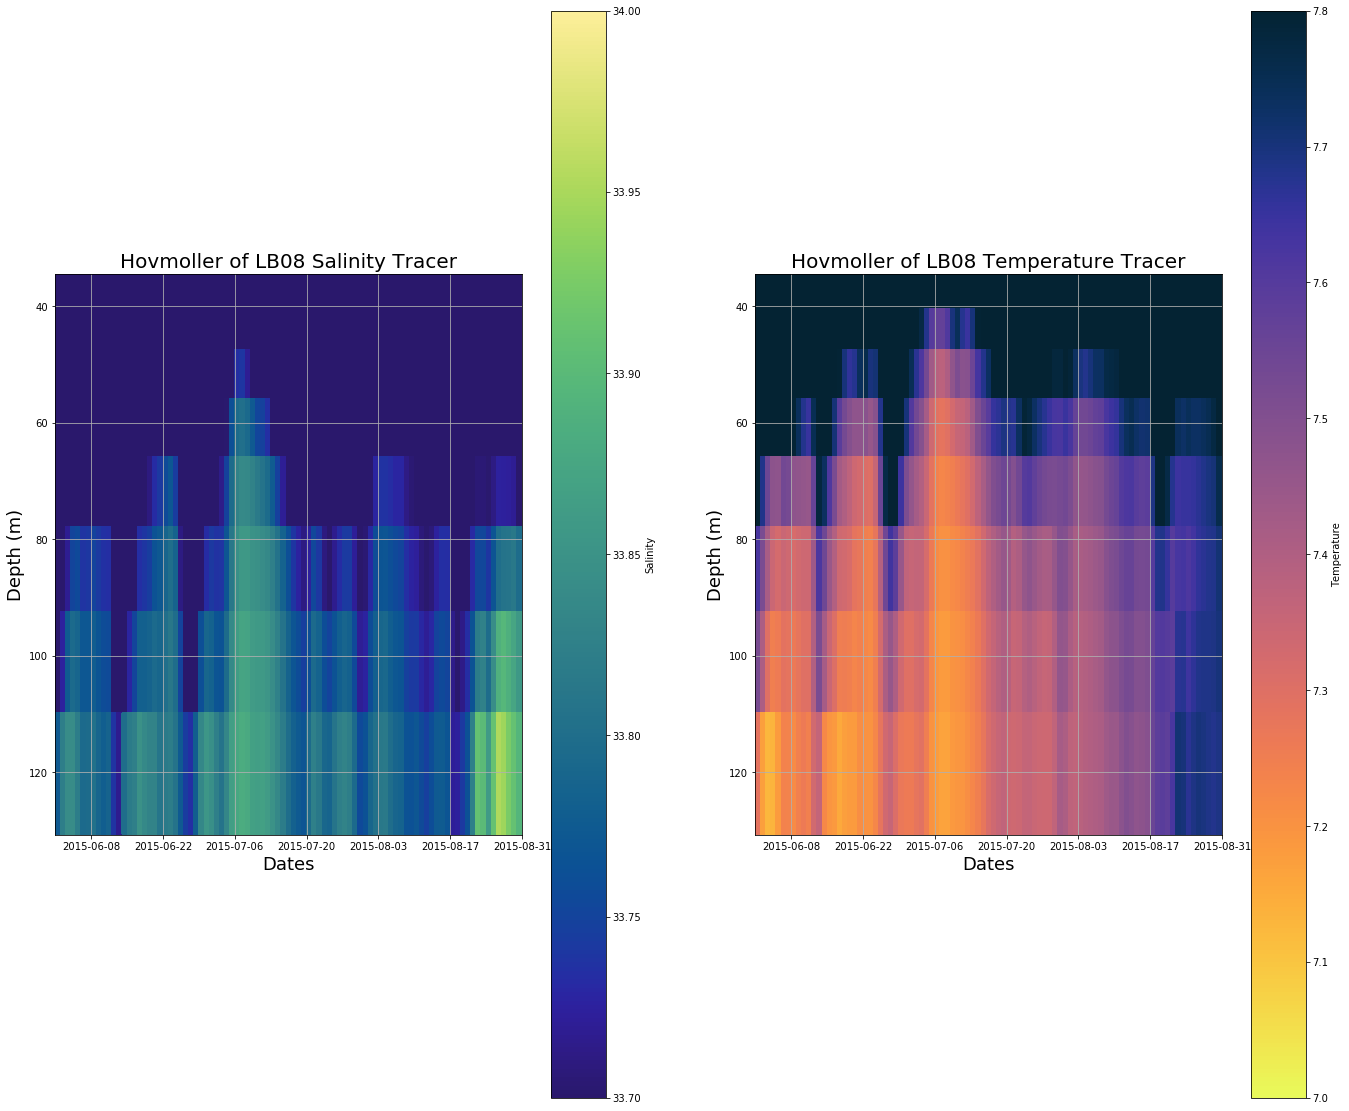

In [14]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(23,20)); 
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')
p = ax1.pcolormesh(date, zlevels[15:24], np.transpose(LB_08_sal[:,15:24]), cmap=cmap, vmin=33.7, vmax =34)#, vmax=500)
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.75)
ax1.set_xlabel('Dates',fontsize=18)
ax1.set_ylabel('Depth (m)',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('Hovmoller of LB08 Salinity Tracer', fontsize=20)
# viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Salinity')
ax1.invert_yaxis()
ax1.grid()


viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.thermal_r)
cmap.set_bad('burlywood')
p = ax2.pcolormesh(date, zlevels[15:24], np.transpose(LB_08_tem[:,15:24]), cmap=cmap, vmin=7, vmax =7.8)#, vmax=500)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.75)
ax2.set_xlabel('Dates',fontsize=18)
ax2.set_ylabel('Depth (m)',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax2.set_title('Hovmoller of LB08 Temperature Tracer', fontsize=20)
# viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax2, label='Temperature')
ax2.invert_yaxis()
ax2.grid()

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


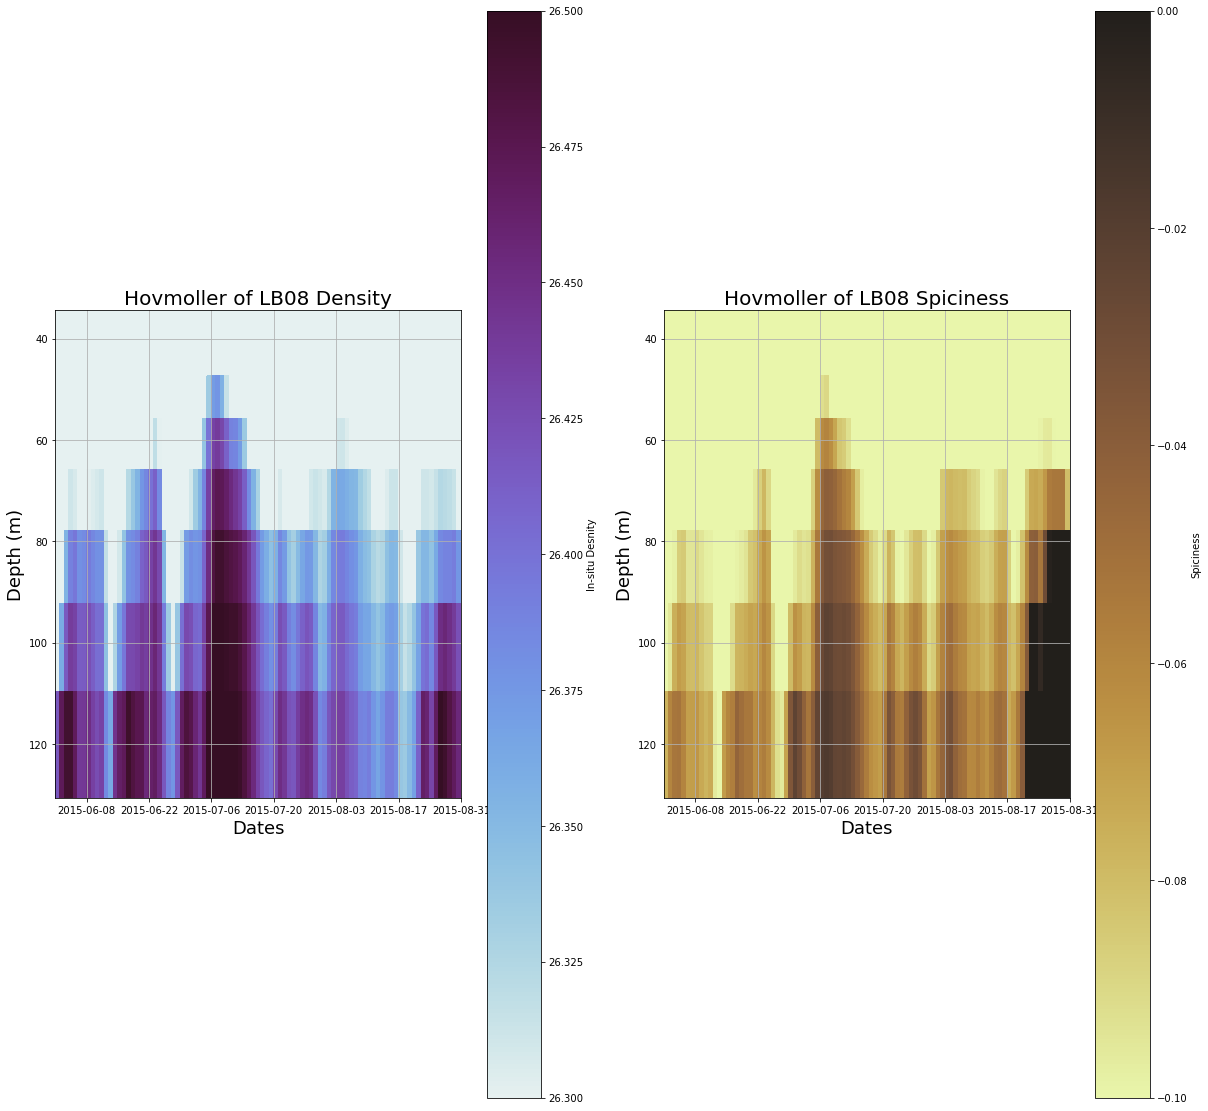

In [22]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,20)); 


viz_tools.set_aspect(ax1)
cmap = plt.get_cmap(cmo.cm.dense)
cmap.set_bad('burlywood')
p = ax1.pcolormesh(date, zlevels[15:24], np.transpose(LB_08_rho[:,15:24]), cmap=cmap, vmin=26.3, vmax =26.5)#, vmax=500)
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.75)
ax1.set_xlabel('Dates',fontsize=18)
ax1.set_ylabel('Depth (m)',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('Hovmoller of LB08 Density', fontsize=20)
# viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='In-situ Desnity')
ax1.invert_yaxis()
ax1.grid()


viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.turbid)
cmap.set_bad('burlywood')
p = ax2.pcolormesh(date, zlevels[15:24], np.transpose(LB_08_spic[:,15:24]), cmap=cmap, vmin=-0.1, vmax =0)#, vmax=500)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.75)
ax2.set_xlabel('Dates',fontsize=18)
ax2.set_ylabel('Depth (m)',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax2.set_title('Hovmoller of LB08 Spiciness', fontsize=20)
ax2.invert_yaxis()
# viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax2, label='Spiciness')
ax2.grid()

In [24]:
zlevels[24]

155.85072

In [12]:
deepest_den = LB_08_rho[:,23]

diff_deepest_den  = np.diff(deepest_den)

In [20]:
np.where(diff_deepest_den == np.max(np.absolute(diff_deepest_den)))

(array([11]),)

In [21]:
LB_08_rho[12,23]

27.139771

In [58]:
LB_08_rho[89,23]

27.077271

In [59]:
date[11]

numpy.datetime64('2015-06-12')

### At the location of maximum density at LB08 (12 June 2015); lets look at how uniform is the profile

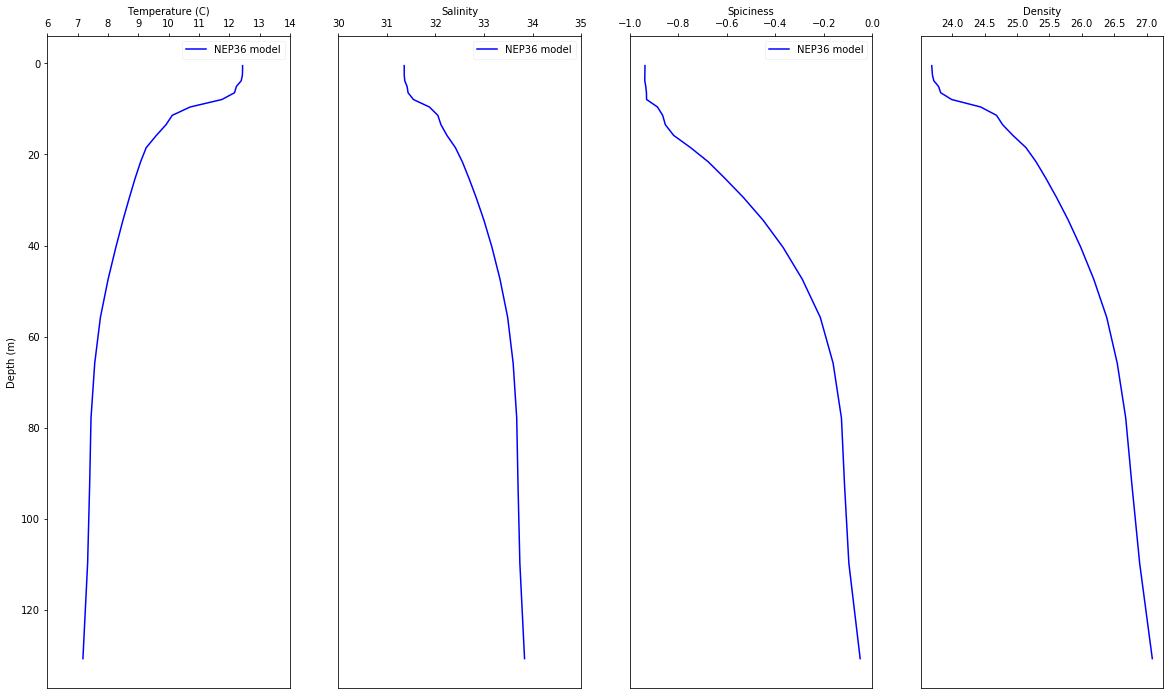

In [50]:
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True,figsize=(20,12))
# Temperature
ax2.plot(LB_08_tem[11,:24],zlevels[:24],'b',label = 'NEP36 model')
# ax2.plot(tem_data ,z_data,'b',label='LA06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(6,14)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(LB_08_sal[11,:24],zlevels[:24],'b',label = 'NEP36 model')
# ax3.plot(sal_data,z_data,'b',label='LA06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(LB_08_spic[11,:24],zlevels[:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

# Spiciness
ax5.plot(LB_08_rho[11,:24],zlevels[:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax5.set_xlabel('Density')
ax5.xaxis.set_label_position('top') 
ax5.xaxis.set_ticks_position('top') 
ax5.yaxis.set_visible(False) 
# ax4.set_xlim(-1,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

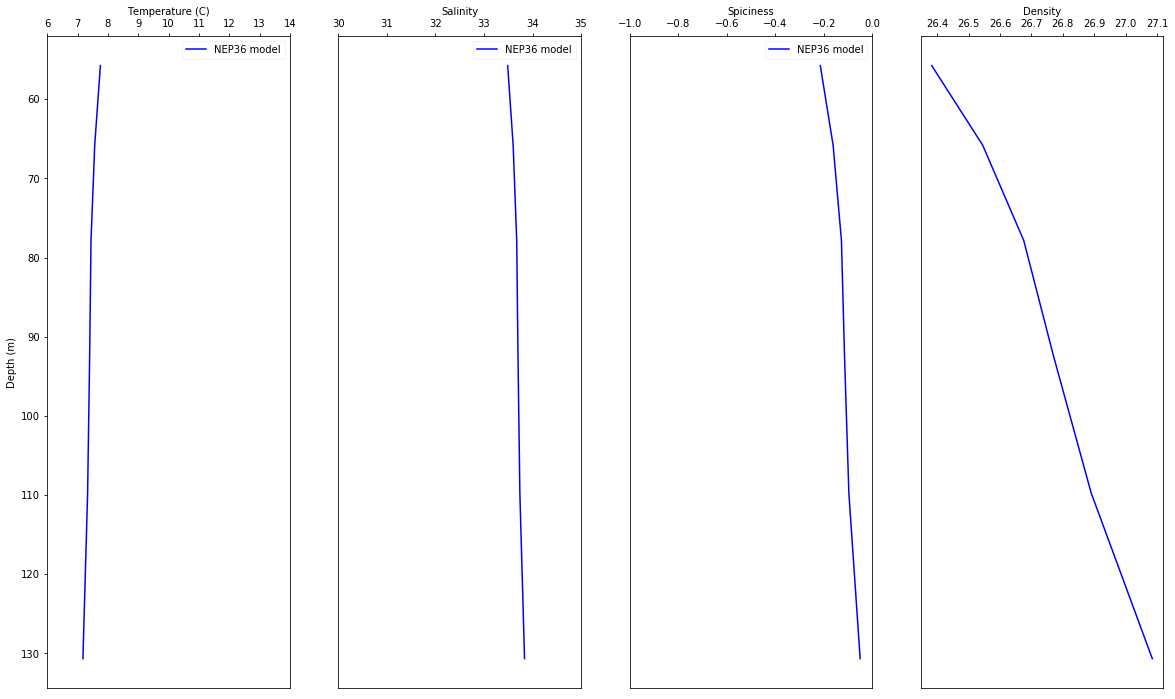

In [55]:
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True,figsize=(20,12))
# Temperature
ax2.plot(LB_08_tem[11,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax2.plot(tem_data ,z_data,'b',label='LA06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(6,14)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(LB_08_sal[11,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax3.plot(sal_data,z_data,'b',label='LA06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(LB_08_spic[11,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

# Spiciness
ax5.plot(LB_08_rho[11,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax5.set_xlabel('Density')
ax5.xaxis.set_label_position('top') 
ax5.xaxis.set_ticks_position('top') 
ax5.yaxis.set_visible(False) 
# ax4.set_xlim(-1,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

In [56]:
deepest_spic = LB_08_spic[:,23]

diff_deepest_spic  = np.diff(deepest_spic)

In [60]:
np.where(diff_deepest_spic == np.max(np.absolute(diff_deepest_spic)))

(array([79]),)

In [61]:
date[79]

numpy.datetime64('2015-08-19')

### At the location of maximum spice at LB08 ( 19 August 2015); lets look at how uniform is the profile

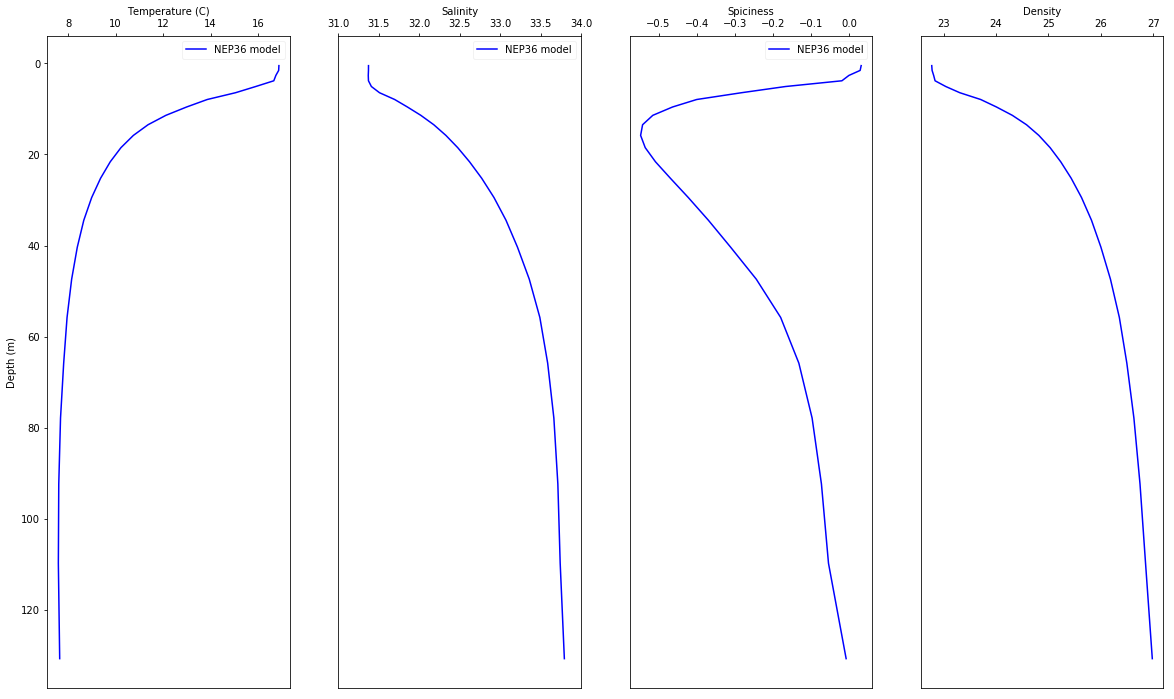

In [32]:
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True,figsize=(20,12))
# Temperature
ax2.plot(LB_08_tem[79,:24],zlevels[:24],'b',label = 'NEP36 model')
# ax2.plot(tem_data ,z_data,'b',label='LA06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
# ax2.set_xlim(6,14)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(LB_08_sal[79,:24],zlevels[:24],'b',label = 'NEP36 model')
# ax3.plot(sal_data,z_data,'b',label='LA06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(31,34)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(LB_08_spic[79,:24],zlevels[:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

# Spiciness
ax5.plot(LB_08_rho[79,:24],zlevels[:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax5.set_xlabel('Density')
ax5.xaxis.set_label_position('top') 
ax5.xaxis.set_ticks_position('top') 
ax5.yaxis.set_visible(False) 
# ax4.set_xlim(-1,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

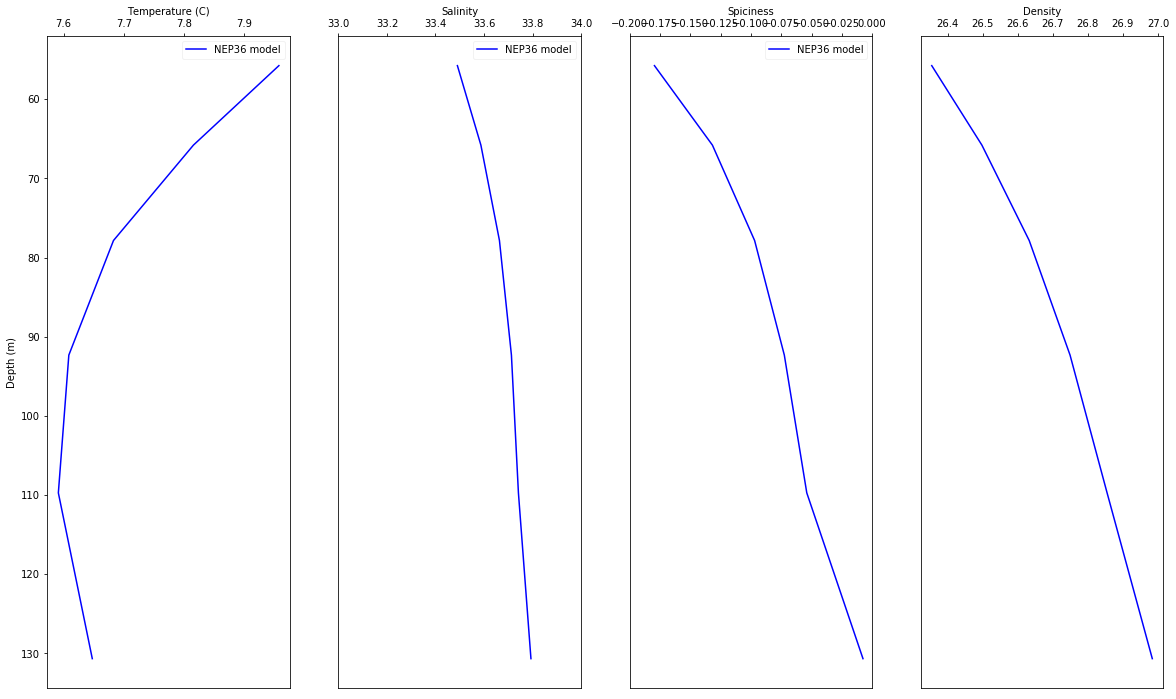

In [62]:
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True,figsize=(20,12))
# Temperature
ax2.plot(LB_08_tem[79,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax2.plot(tem_data ,z_data,'b',label='LA06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
# ax2.set_xlim(6,14)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(LB_08_sal[79,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax3.plot(sal_data,z_data,'b',label='LA06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(33,34)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(LB_08_spic[79,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

# Spiciness
ax5.plot(LB_08_rho[79,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax5.set_xlabel('Density')
ax5.xaxis.set_label_position('top') 
ax5.xaxis.set_ticks_position('top') 
ax5.yaxis.set_visible(False) 
ax4.set_xlim(-0.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

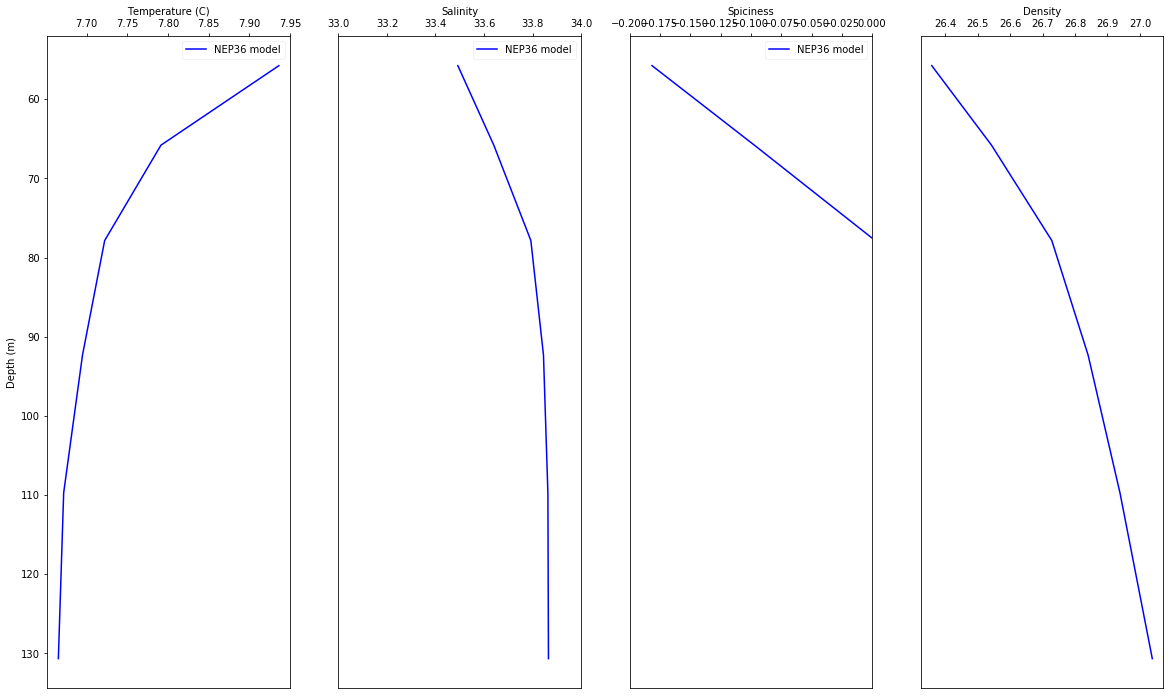

In [61]:
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True,figsize=(20,12))
# Temperature
ax2.plot(LB_08_tem[91,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax2.plot(tem_data ,z_data,'b',label='LA06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
# ax2.set_xlim(6,14)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(LB_08_sal[91,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax3.plot(sal_data,z_data,'b',label='LA06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(33,34)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
#Spiciness
ax4.plot(LB_08_spic[91,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

# Spiciness
ax5.plot(LB_08_rho[91,18:24],zlevels[18:24],'b',label = 'NEP36 model')
# ax4.plot(spic_data,z_data,'b',label='LA06')
ax5.set_xlabel('Density')
ax5.xaxis.set_label_position('top') 
ax5.xaxis.set_ticks_position('top') 
ax5.yaxis.set_visible(False) 
ax4.set_xlim(-0.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

In [44]:
LB_08_spic[91,18:24]

array([-0.18152772, -0.09716699,  0.00243996,  0.03609674,  0.04603141,
        0.0471314 ], dtype=float32)

In [45]:
LB_08_rho[91,18:24]

array([ 26.35888672,  26.54284668,  26.72851562,  26.84033203,
        26.93847656,  27.03796387], dtype=float32)

In [46]:
zlevels[18:24]

array([  55.76428986,   65.80727386,   77.85385132,   92.32607269,
        109.72927856,  130.66598511], dtype=float32)

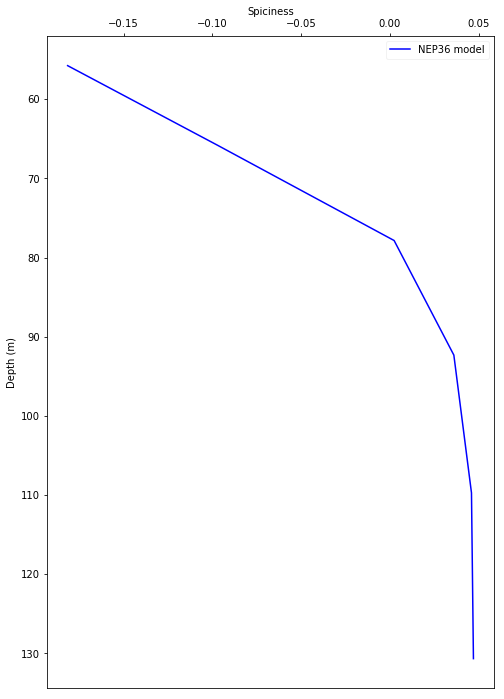

In [57]:
fig2, ax = plt.subplots(1,1,figsize=(8,12))



ax.plot(LB_08_spic[91,18:24],zlevels[18:24],'b',label = 'NEP36 model')
ax.set_ylim(ax.get_ylim()[::-1]) 
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Spiciness')
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticks_position('top')  
# ax.set_xlim(-1,1)
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)